Evaluation with Bag of Words:
Cross-Validation F1 Score: 0.93
Accuracy: 0.9464627151051626
F1 Score: 0.9464521450835707
Confusion Matrix:
 [[26  0  0  0  0  0  1  0  0  0  0  0  0  1  0]
 [ 0 39  0  0  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  0 31  0  0  0  0  1  0  0  0  0  0  0  0]
 [ 0  0  0 38  0  0  0  0  0  0  1  1  0  0  0]
 [ 0  0  0  0 31  0  0  0  1  0  0  0  0  0  0]
 [ 0  0  0  0  0 26  0  0  0  0  0  0  0  0  0]
 [ 0  1  0  0  0  1 31  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 37  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  0 23  0  0  0  0  0  1]
 [ 0  1  0  0  0  0  0  0  0 31  0  0  0  0  0]
 [ 0  0  0  2  0  0  0  0  0  0 31  0  0  0  0]
 [ 0  1  0  0  0  0  2  0  0  0  0 42  0  2  0]
 [ 0  0  0  0  0  0  1  0  0  1  0  0 37  0  0]
 [ 0  0  0  1  1  0  0  0  0  1  1  1  1 33  0]
 [ 0  0  0  0  0  0  0  0  0  1  0  0  0  0 39]]
Classification Report:
                  precision    recall  f1-score   support

Art and Culture       1.00      0.93      0.96        28
 

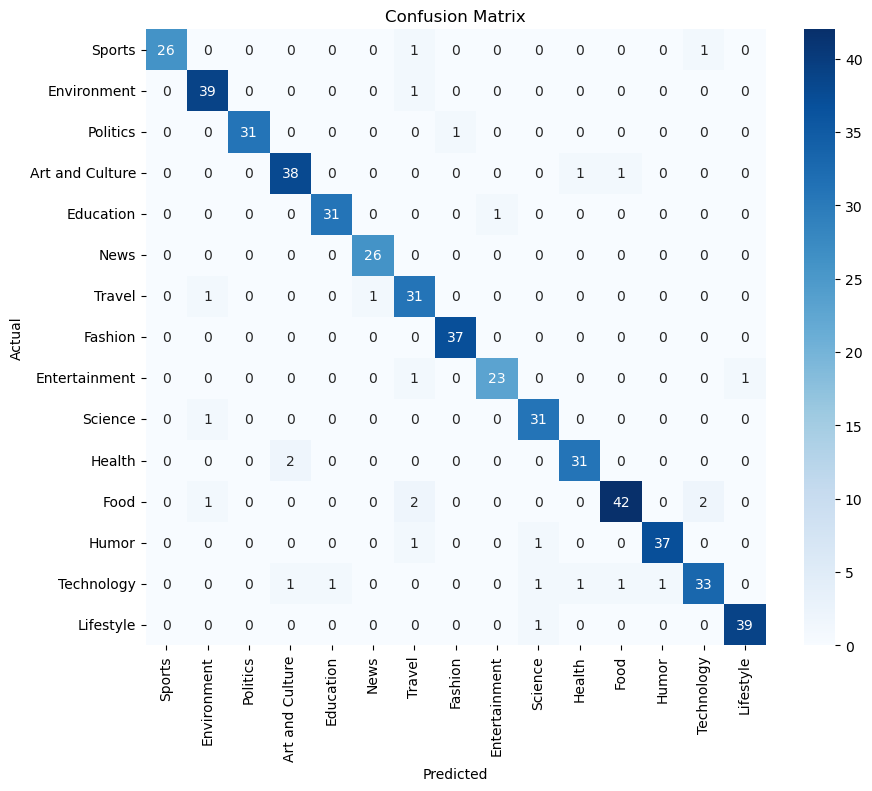

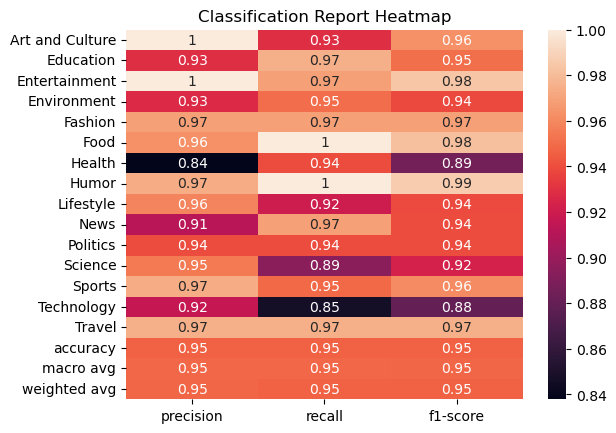


Evaluation with TF-IDF:
Cross-Validation F1 Score: 0.93
Accuracy: 0.9388145315487572
F1 Score: 0.9383803948768675
Confusion Matrix:
 [[24  0  0  0  1  0  1  0  0  0  0  0  0  1  1]
 [ 0 39  0  0  0  0  1  0  0  0  0  0  0  0  0]
 [ 1  0 30  0  0  0  0  1  0  0  0  0  0  0  0]
 [ 0  0  0 39  0  0  0  0  0  0  0  1  0  0  0]
 [ 0  0  0  0 31  0  0  0  1  0  0  0  0  0  0]
 [ 0  0  0  0  0 26  0  0  0  0  0  0  0  0  0]
 [ 0  2  0  0  0  1 28  0  1  0  0  1  0  0  0]
 [ 0  0  0  0  0  0  1 36  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 24  0  0  0  0  0  1]
 [ 0  0  0  0  0  0  0  0  0 32  0  0  0  0  0]
 [ 0  0  0  2  0  0  0  0  0  0 31  0  0  0  0]
 [ 0  2  0  0  0  0  1  0  0  0  0 42  0  2  0]
 [ 0  1  0  0  0  0  0  0  0  1  0  0 37  0  0]
 [ 0  0  0  1  1  0  0  0  0  0  2  1  1 33  0]
 [ 0  0  0  0  0  0  0  0  0  1  0  0  0  0 39]]
Classification Report:
                  precision    recall  f1-score   support

Art and Culture       0.96      0.86      0.91        28
      

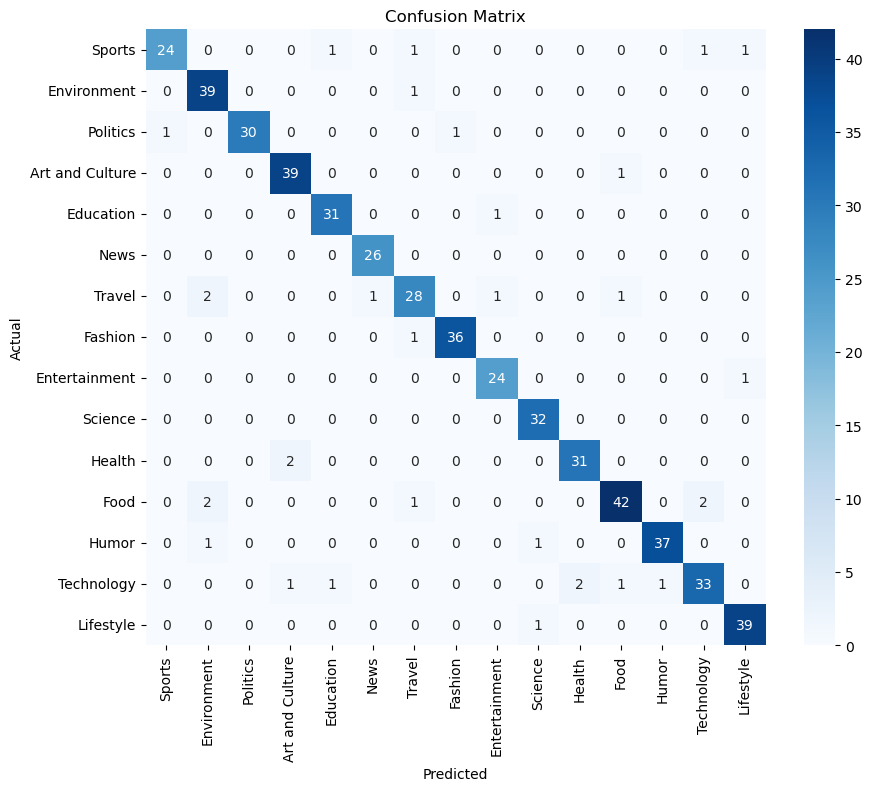

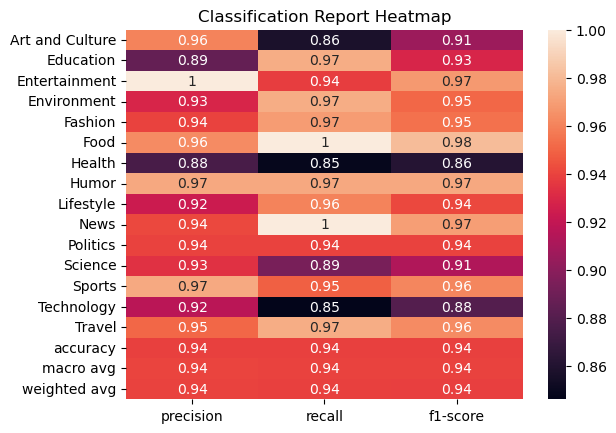

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
import seaborn as sns
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier

# Chargement des données
file_path_train = 'data/train.csv'
file_path_test = 'data/test.csv'

df_train = pd.read_csv(file_path_train)
df_test = pd.read_csv(file_path_test)

# Prétraitement des textes
def preprocess(text):
    text = text.lower()
    text = re.sub(r'\W+', ' ', text)
    return text

texts_train = [preprocess(text) for text in df_train['content'].tolist()]
texts_test = [preprocess(text) for text in df_test['content'].tolist()]

# Préparation des données pour l'entraînement et le test
X_train = texts_train
X_test = texts_test
y_train = df_train['topic'].tolist()
y_test = df_test['topic'].tolist()

# Vectorisation - Bag of Words
vectorizer = CountVectorizer()
X_train_bow = vectorizer.fit_transform(X_train)
X_test_bow = vectorizer.transform(X_test)

# Vectorisation - TF-IDF
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Fonction pour évaluer, visualiser les résultats du modèle et afficher le rapport de classification
def evaluate_and_visualize(model, X_train, y_train, X_test, y_test):
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    scores = cross_val_score(model, X_train, y_train, cv=skf, scoring='f1_weighted')
    print(f'Cross-Validation F1 Score: {np.mean(scores):.2f}')

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))
    conf_matrix = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:\n", conf_matrix)
    print("Classification Report:\n", classification_report(y_test, y_pred))

    # Tracé de la matrice de confusion
    plt.figure(figsize=(10, 8))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=df_train['topic'].unique(), yticklabels=df_train['topic'].unique())
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # Génération et affichage du rapport de classification sous forme de heatmap
    labels = np.unique(y_test)
    clf_report = classification_report(y_test, y_pred, labels=labels, output_dict=True)
    sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True)
    plt.title('Classification Report Heatmap')
    plt.show()

# Evaluation et visualisation avec Bag of Words
print("Evaluation with Bag of Words:")
rf_model_bow = RandomForestClassifier(random_state=42)
evaluate_and_visualize(rf_model_bow, X_train_bow, y_train, X_test_bow, y_test)

# Evaluation et visualisation avec TF-IDF
print("\nEvaluation with TF-IDF:")
rf_model_tfidf = RandomForestClassifier(random_state=42)
evaluate_and_visualize(rf_model_tfidf, X_train_tfidf, y_train, X_test_tfidf, y_test)